
# Binary textures

.. codeauthor:: Frédéric Richard <frederic.richard_at_univ-amu.fr>

In this example, we show how to simulate
texture images with binary patterns.

Binary patterns are obtained by applying a Laplacian operator to simulated
fields, which highlights the field geometry.


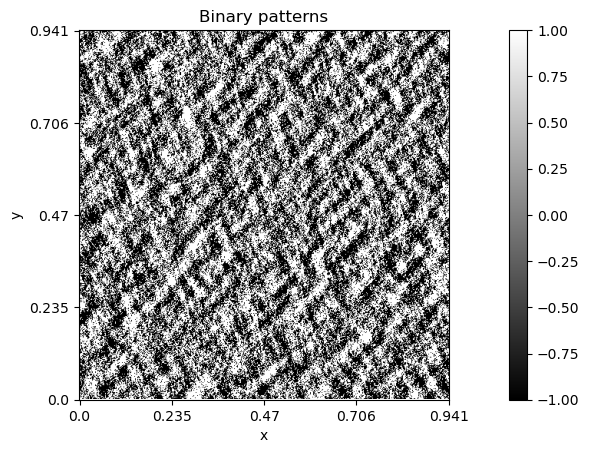

In [1]:
import numpy as np
from afbf import perfunction, tbfield

# Define an AFBF.
topo = perfunction('Fourier', 3, 'Topo')
hurst = perfunction('step', 2, 'Hurst')
Z = tbfield('afbf', topo, hurst)
Z.hurst.ChangeParameters(np.array([[0.5, 0.1]]), np.array([[-1.18, 1.3]]))
Z.topo.ChangeParameters(np.array([[2, 1, 0, 0.06, -0.15, 0.64, 0.25]]))

# Simulate the field.
np.random.seed(1)
z = Z.Simulate()

# Compute the Laplacian of the simulation at scale 20.
laplacian = z.ComputeLaplacian(15)
# Compute its sign.
patterns = laplacian.ComputeImageSign()

# Display.
patterns.name = 'Binary patterns'
patterns.Display()